## Solving:

## $H = \frac{- \hbar^2}{2 m} (\partial_x^2 + \partial_y^2) + V(y)$

## Import libraries

In [1]:
import kwant
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

import os.path
def save_image(name):
    folder = "./figures/"
    if os.path.exists(folder + name + ".png"):
        raise Exception("File already exist")
        return 0
    
    plt.savefig(folder + name + ".png", dpi=300)

## Create an “empty” tight binding system.

In [2]:
t = 1.0
W = 10
L = 30
a = 1

#define square lattice
lat = kwant.lattice.square(a)

#build system
syst1 = kwant.Builder()
syst2 = kwant.Builder()
syst3 = kwant.Builder()
syst4 = kwant.Builder()

## Set its matrix elements and hoppings.

In [3]:
# Define the scattering region
for i in range(L):
    for j in range(W):
        # On-site Hamiltonian
        syst1[lat(i, j)] = 4 * t
        # Hopping in y-direction
        if j > 0:
            syst1[lat(i, j), lat(i, j - 1)] = -t
        # Hopping in x-direction
        if i > 0:
            syst1[lat(i, j), lat(i - 1, j)] = -t
            
            
            
for i in range(W):
    for j in range(L):
        syst2[lat(i, j)] = 4 * t
        if j > 0:
            syst2[lat(i, j), lat(i, j - 1)] = -t
        if i > 0:
            syst2[lat(i, j), lat(i - 1, j)] = -t

for i in range(W):
    for j in range(L):
        syst3[lat(i, j)] = 4 * t
        if j > 0:
            syst3[lat(i, j), lat(i, j - 1)] = -t
        if i > 0:
            syst3[lat(i, j), lat(i - 1, j)] = -t

for i in range(W):
    for j in range(L):
        syst4[lat(i, j)] = 4 * t
        if j > 0:
            syst4[lat(i, j), lat(i, j - 1)] = -t
        if i > 0:
            syst4[lat(i, j), lat(i - 1, j)] = -t

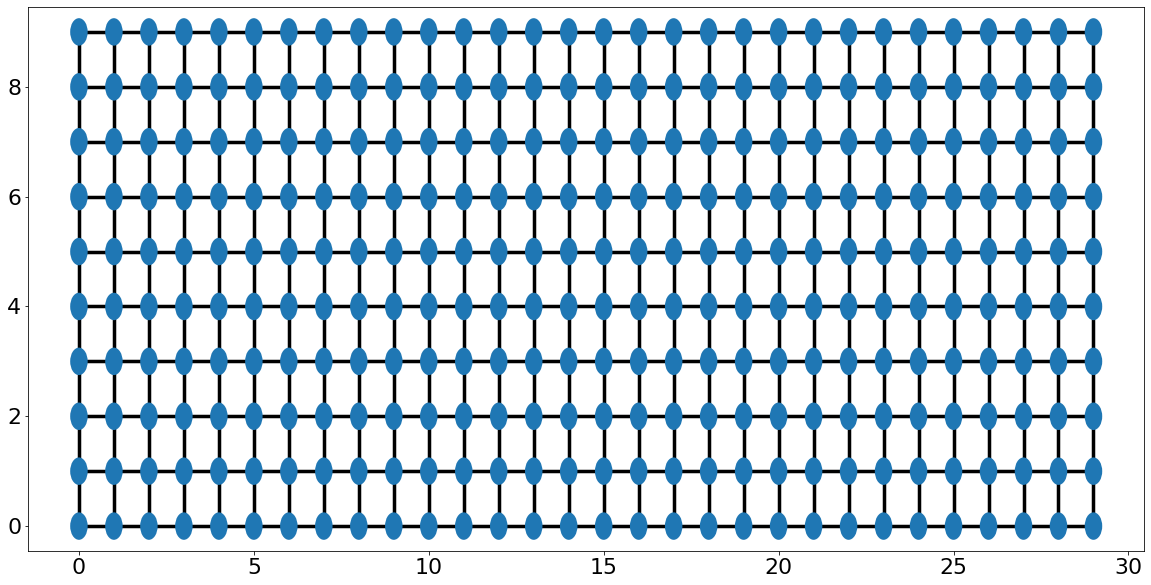

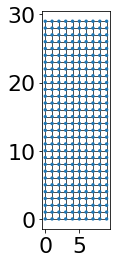

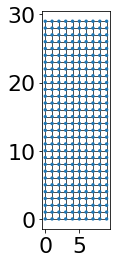

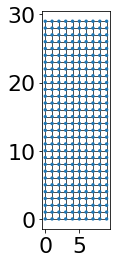

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
_ = kwant.plot(syst1, ax=ax)
#save_image("system")


_ = kwant.plot(syst2)
_ = kwant.plot(syst3)
_ = kwant.plot(syst4)

## Attach leads (tight binding systems with translational symmetry).

In [5]:
#utilising translational simmetry for building the lead
sym_left_lead = kwant.TranslationalSymmetry((-a, 0))
left_lead = kwant.Builder(sym_left_lead)

#region of lead
for j in range(W):
    #define on site
    left_lead[lat(0, j)] = 4 * t
    #define hopping
    if j > 0:
        left_lead[lat(0, j), lat(0, j - 1)] = -t
    left_lead[lat(1, j), lat(0, j)] = -t
syst1.attach_lead(left_lead)


sym_left_lead_2 = kwant.TranslationalSymmetry((-a, 0))
left_lead_2 = kwant.Builder(sym_left_lead_2)
for j in range(L):
    left_lead_2[lat(0, j)] = 4 * t
    if j > 0:
        left_lead_2[lat(0, j), lat(0, j - 1)] = -t
    left_lead_2[lat(1, j), lat(0, j)] = -t
syst2.attach_lead(left_lead_2)
syst3.attach_lead(left_lead_2)
syst4.attach_lead(left_lead_2)

[]

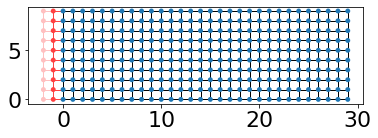

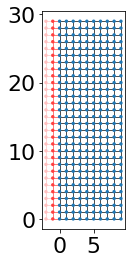

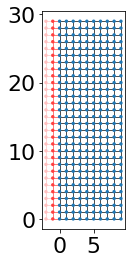

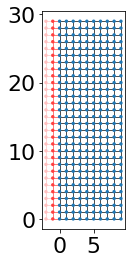

In [6]:
_ = kwant.plot(syst1)
_ = kwant.plot(syst2)
_ = kwant.plot(syst3)
_ = kwant.plot(syst4)

In [7]:
sym_right_lead = kwant.TranslationalSymmetry((a, 0))
right_lead = kwant.Builder(sym_right_lead)
for j in range(W):
    right_lead[lat(0, j)] = 4 * t
    if j > 0:
        right_lead[lat(0, j), lat(0, j - 1)] = -t
    right_lead[lat(1, j), lat(0, j)] = -t
syst1.attach_lead(right_lead)


sym_right_lead_2 = kwant.TranslationalSymmetry((a, 0))
right_lead_2 = kwant.Builder(sym_right_lead_2)
for j in range(L):
    right_lead_2[lat(0, j)] = 4 * t
    if j > 0:
        right_lead_2[lat(0, j), lat(0, j - 1)] = -t
    right_lead_2[lat(1, j), lat(0, j)] = -t
syst2.attach_lead(right_lead_2)

sym_right_lead_3 = kwant.TranslationalSymmetry((a, 0))
right_lead_3 = kwant.Builder(sym_right_lead_3)
for j in range(W):
    right_lead_3[lat(0, j)] = 4 * t
    if j > 0:
        right_lead_3[lat(0, j), lat(0, j - 1)] = -t
    right_lead_3[lat(1, j), lat(0, j)] = -t
syst3.attach_lead(right_lead_3)

sym_right_lead_4 = kwant.TranslationalSymmetry((a, 0))
right_lead_4 = kwant.Builder(sym_right_lead_4)
lead_pos = np.array([10,11,12,13,14,15,16,17,18,19,20], dtype="int")
for j in lead_pos:
    right_lead_4[lat(0, j)] = 4 * t
    if lead_pos.min() < j <= lead_pos.max():
        right_lead_4[lat(0, j), lat(0, j - 1)] = -t
    right_lead_4[lat(1, j), lat(0, j)] = -t
syst4.attach_lead(right_lead_4)

[]

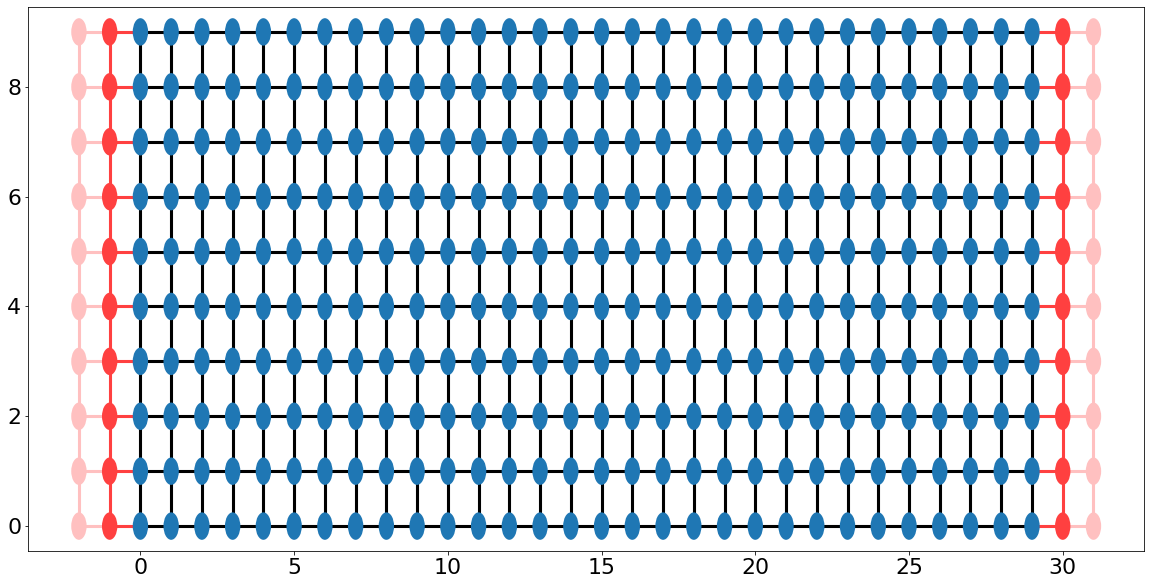

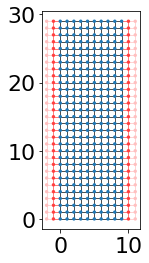

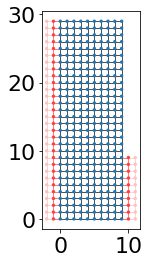

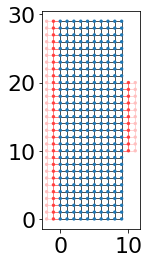

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
_ = kwant.plot(syst1, ax=ax)
#save_image("lead")
_ = kwant.plot(syst2)
_ = kwant.plot(syst3)
_ = kwant.plot(syst4)

In [9]:
syst1 = syst1.finalized()
syst2 = syst2.finalized()
syst3 = syst3.finalized()
syst4 = syst4.finalized()

## Pass the finalized system to a solver.

In [10]:
energies = []
data1 = []
data2 = []

for ie in range(1000):
    energy = ie * 0.001

    # compute the scattering matrix at a given energy
    smatrix1 = kwant.smatrix(syst1, energy)
    smatrix2 = kwant.smatrix(syst2, energy)
    
    # compute the transmission probability
    energies.append(energy)
    data1.append(smatrix1.transmission(1, 0))
    data2.append(smatrix2.transmission(1, 0))

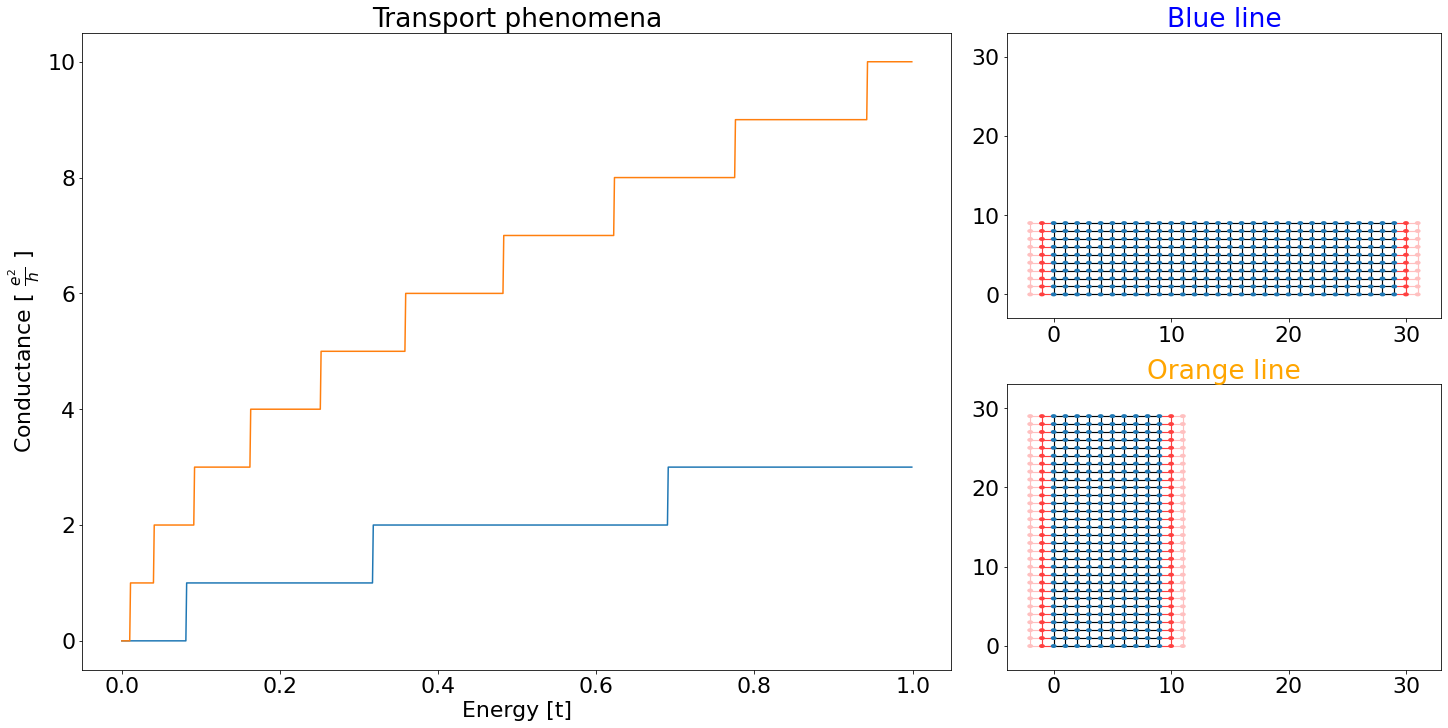

In [11]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})
axs['Left'].set_title('Transport phenomena')
axs['Left'].plot(energies, data1)
axs['Left'].plot(energies, data2)

axs['Left'].set_xlabel("Energy [t]")
axs['Left'].set_ylabel(r'Conductance [ $\frac{e^2}{h}$ ]')

axs['TopRight'].set_title('Blue line', c='blue')
axs['BottomRight'].set_title('Orange line', c='orange')
axs['TopRight'].set_xlim(-4,33)
axs['TopRight'].set_ylim(-3,33)
axs['BottomRight'].set_xlim(-4,33)
axs['BottomRight'].set_ylim(-3,33)

system_image_1 = kwant.plot(syst1, ax=axs['TopRight'])
system_image_2 = kwant.plot(syst2, ax=axs['BottomRight'])

#save_image("conductance1.1")
plt.show()

In [12]:
energies = []
data3 = []
data4 = []

for ie in range(1000):
    energy = ie * 0.001
    # compute the scattering matrix at a given energy
    smatrix3 = kwant.smatrix(syst3, energy)
    smatrix4 = kwant.smatrix(syst4, energy)

    # compute the transmission probability
    energies.append(energy)
    data3.append(smatrix3.transmission(1, 0))
    data4.append(smatrix4.transmission(1, 0))

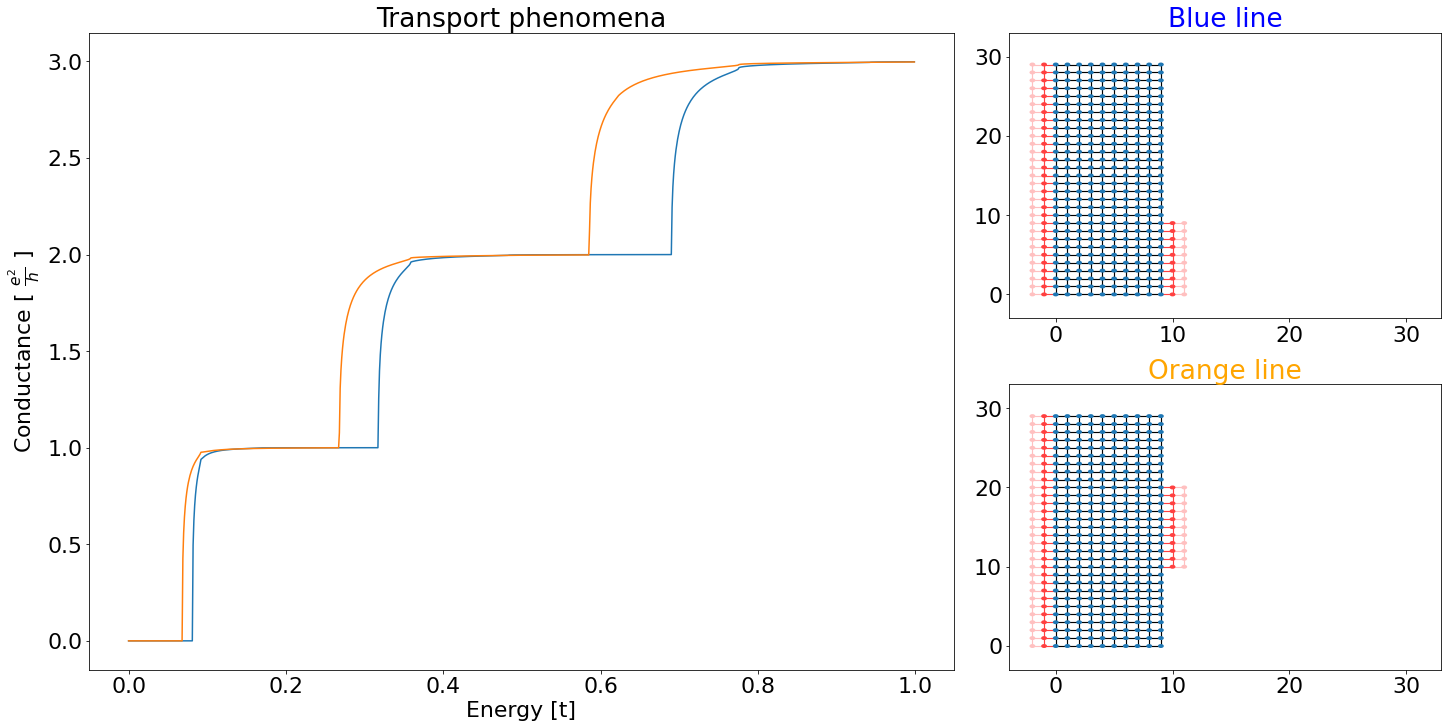

In [13]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})
axs['Left'].set_title('Transport phenomena')
axs['Left'].plot(energies, data3)
axs['Left'].plot(energies, data4)

axs['Left'].set_xlabel("Energy [t]")
axs['Left'].set_ylabel(r'Conductance [ $\frac{e^2}{h}$ ]')

axs['TopRight'].set_title('Blue line', c='blue')
axs['BottomRight'].set_title('Orange line', c='orange')
axs['TopRight'].set_xlim(-4,33)
axs['TopRight'].set_ylim(-3,33)
axs['BottomRight'].set_xlim(-4,33)
axs['BottomRight'].set_ylim(-3,33)

system_image_1 = kwant.plot(syst3, ax=axs['TopRight'])
system_image_2 = kwant.plot(syst4, ax=axs['BottomRight'])

#save_image("conductance1.2")
plt.show()